Populating the interactive namespace from numpy and matplotlib


/home/mjirik/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


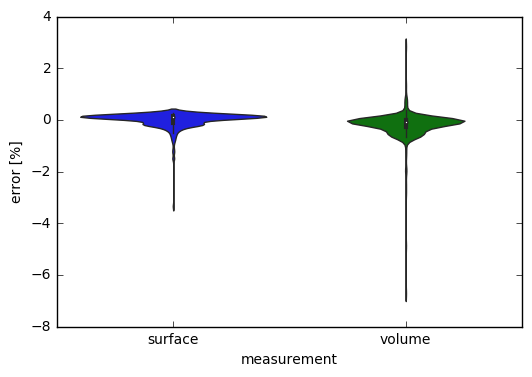

0/770


In [9]:
%run evaltools.ipynb

In [10]:
datapath
df = read_data(datapath)

 770 :
volume (w/s): 
WilcoxonResult(statistic=99153.0, pvalue=1.4694467627330106e-15) 
SpearmanrResult(correlation=0.99398996466437239, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=64397.0, pvalue=3.5407780012402888e-42) 
SpearmanrResult(correlation=0.99706741998573023, pvalue=0.0) 



,surface error [%],volume error [%],measurement_resolution
238,0.270582,0.025374,26
194,-0.361218,0.281214,26
196,-0.402922,-1.400461,26
198,0.266710,0.017996,26
772,0.011788,-0.418195,26
202,0.266278,0.017532,26
204,0.179990,-0.210376,26
206,0.181374,-0.204299,26
208,0.181411,-0.204187,26
210,0.268342,0.022312,26


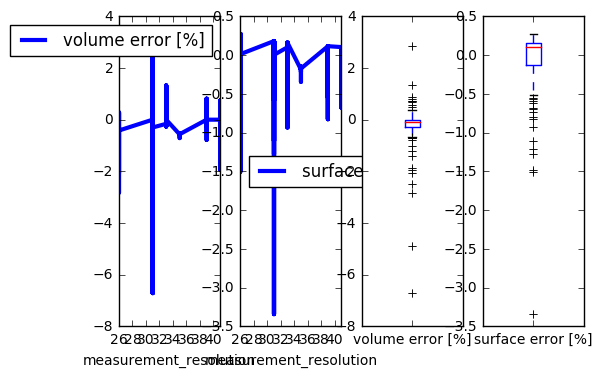

In [11]:
show_error(df)

In [12]:
list_filter(df.keys(), contain="note")

['config output note']

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan

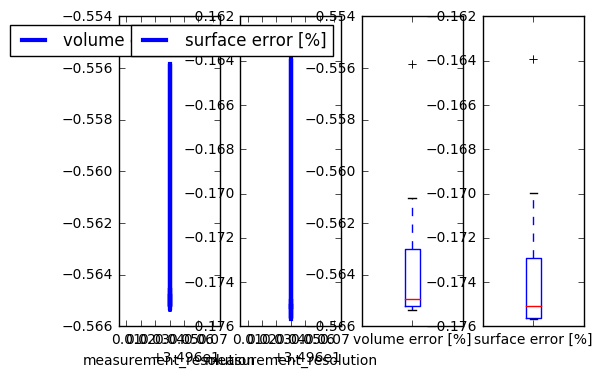

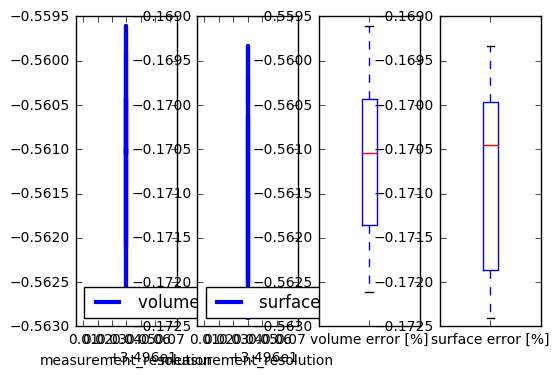

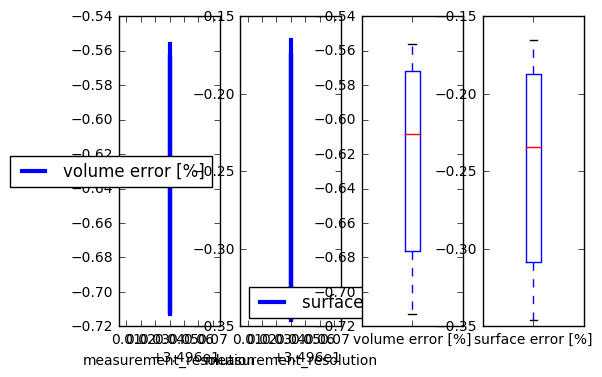

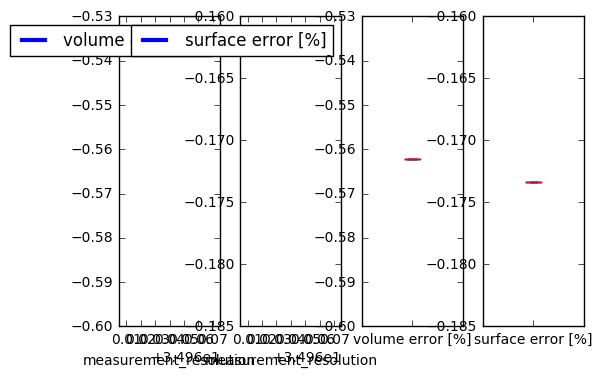

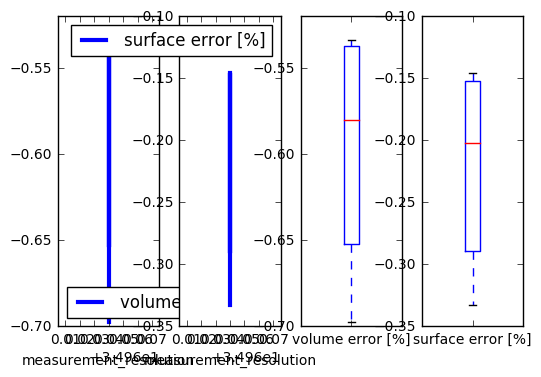

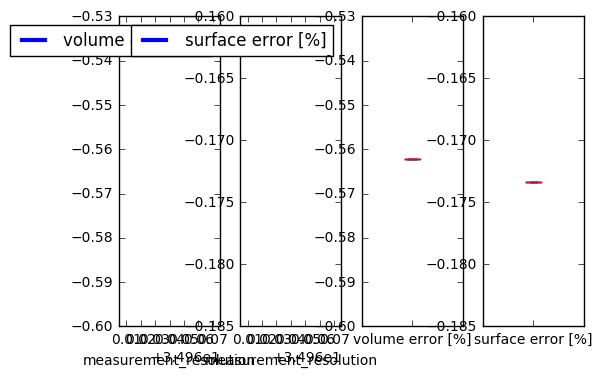

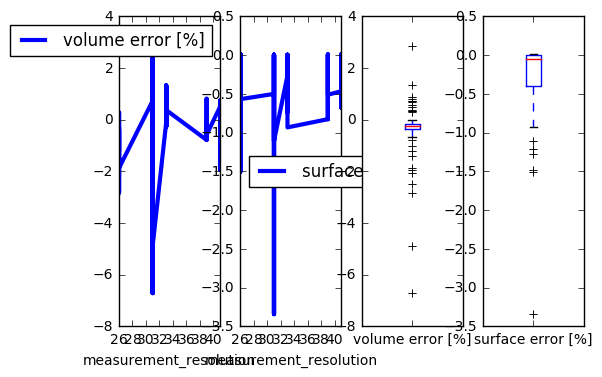

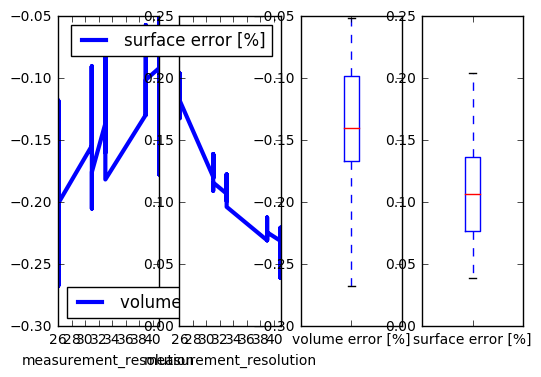

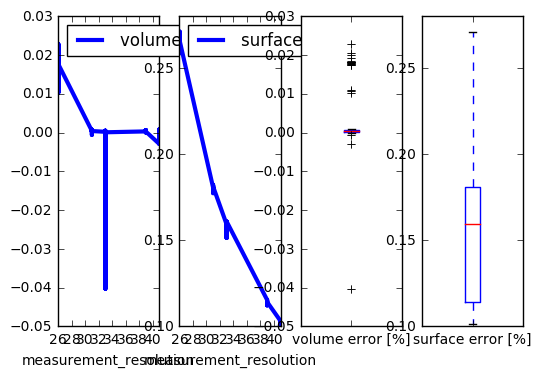

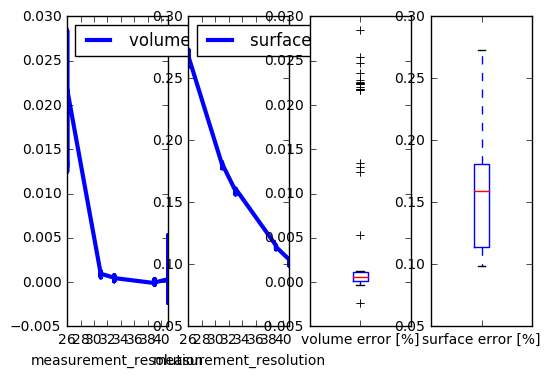

In [13]:
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
    show_error(dfs)

# Object number

In [14]:

for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)

In [15]:
# zip(list(dfs_group))